In [1]:
import sys
sys.path.insert(0,'/home/users/jholt/Git/COAsT/')

import matplotlib.pylab as plt
import coast
import numpy as np

In [2]:
names,dpaths,DOMS,_  = coast.experiments(experiments='../Python/experiments_paper.json') 

In [3]:
names

['GS1p0_notide', 'GS1p1_tide', 'GS1p2_full']

In [4]:
fnam='SENEMO_1m_20110101_20111231_grid_T_201108-201108.nc'


fn_nemo_dat = dpaths[0] + fnam
fn_config_t_grid='/home//users/jholt/work/Git/COAsT/config/example_nemo_grid_t.json'
nemo_t1 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[0], config=fn_config_t_grid)
fn_nemo_dat = dpaths[1] + fnam
nemo_t2 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[1], config=fn_config_t_grid)
fn_nemo_dat = dpaths[2] + fnam
nemo_t3 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[2], config=fn_config_t_grid)

In [5]:
fnam='SENEMO_1m_20110101_20111231_grid_W_201108-201108.nc'
fn_nemo_dat = dpaths[0] + fnam
fn_config_t_grid='/home//users/jholt/work/Git/COAsT/config/example_nemo_grid_w.json'
nemo_w1 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[0], config=fn_config_t_grid)
fn_nemo_dat = dpaths[1] + fnam
nemo_w2 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[1], config=fn_config_t_grid)
fn_nemo_dat = dpaths[2] + fnam
nemo_w3 = coast.Gridded(fn_data = fn_nemo_dat, fn_domain = DOMS[2], config=fn_config_t_grid)

/home/users/jholt/Git/COAsT/coast/data/gridded.py:237: UserWarning: The model domain loaded, '/gws/nopw/j04/class_vol2/senemo/RUNS2024r01/GS1p2_full/config/domain_cfg.nc', does not contain the bathy_metry' variable. This will result in the NEMO.dataset.bathymetry variable being set to zero, which may result in unexpected behaviour from routines that require this variable.


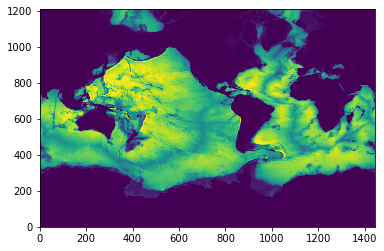

In [6]:
plt.pcolormesh(nemo_t1.dataset.bathymetry[:,:])

In [7]:
#N Sea, Eq Pacific, Indo Sea
rname=['N Sea', 'Indo Sea','Eq Pacific', 'Weddle Sea']
J=[950,660,565,390]
I=[1140,200,685,1000]


In [14]:
def plot_var(var,grid='T'):
    fig=plt.figure(figsize=[8.27,11.69])
    for ii in range(len(J)):
        i=I[ii]
        j=J[ii]
        if grid=='T':
            T1=nemo_t1.dataset.variables[var].values[0,:,j,i]
            T2=nemo_t2.dataset.variables[var].values[0,:,j,i]
            T3=nemo_t3.dataset.variables[var].values[0,:,j,i]
        elif grid=='W':
            T1=nemo_w1.dataset.variables[var].values[0,:,j,i]
            T2=nemo_w2.dataset.variables[var].values[0,:,j,i]
            T3=nemo_w3.dataset.variables[var].values[0,:,j,i]
        Z1=nemo_t1.dataset.coords['depth_0'].values[:,j,i]
        Z2=nemo_t2.dataset.coords['depth_0'].values[:,j,i]
        Z3=nemo_t3.dataset.coords['depth_0'].values[:,j,i]
    
        plt.subplot(2,2,ii+1)
        if grid =='T':
            plt.plot(T1,-Z1,T2,-Z2,T3,-Z3)
        elif grid=='W':
            plt.plot(np.log10(T1),-Z1,np.log10(T2),-Z2,np.log10(T3),-Z3)
        plt.legend(names)
        plt.title(f'{var} profile in {rname[ii]}')

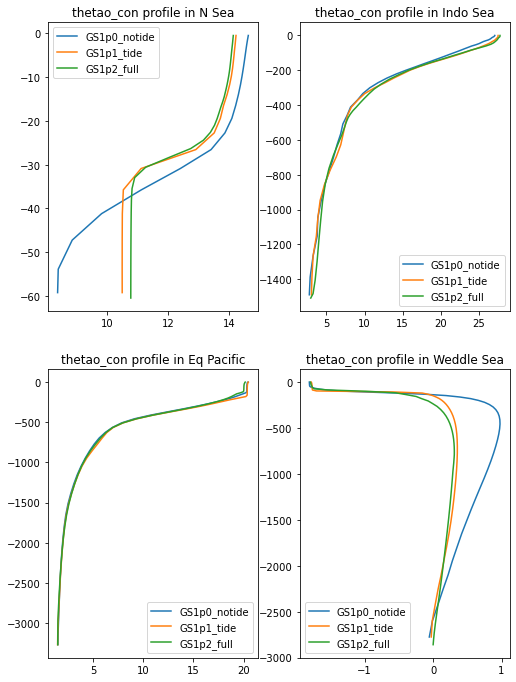

In [9]:
plot_var('thetao_con')

/tmp/ipykernel_1460/4038856913.py:22: RuntimeWarning: divide by zero encountered in log10


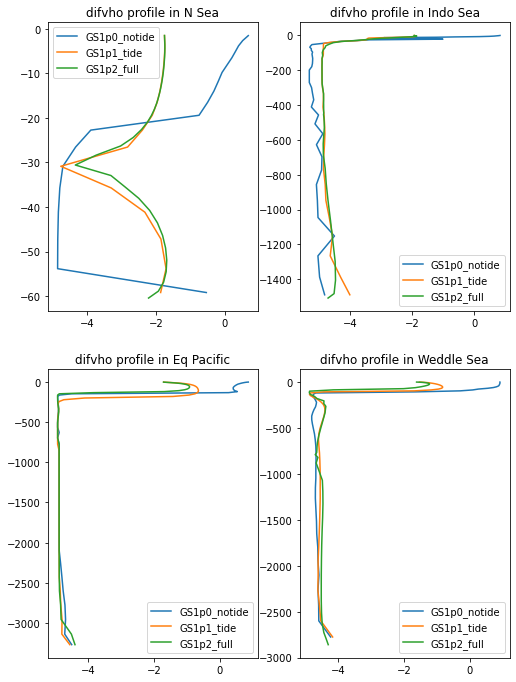

In [15]:
plot_var('difvho',grid='W')

In [16]:
    for ii in range(len(J)):
        i=I[ii]
        j=J[ii]
        Z1=nemo_t1.dataset.coords['depth_0'].values[:,j,i]
        Z2=nemo_t2.dataset.coords['depth_0'].values[:,j,i]
        Z3=nemo_t3.dataset.coords['depth_0'].values[:,j,i]
        

NameError: name 'j' is not defined